In [1]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model, to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Input, Lambda, Conv2D, MaxPooling2D, BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [4]:
datagen = ImageDataGenerator(
            featurewise_center = False,
            samplewise_center = False,
            featurewise_std_normalization = False,
            samplewise_std_normalization = False,
            zca_whitening = False,
            rotation_range = 30,
            width_shift_range = 0.3,
            height_shift_range = 0.3,
            horizontal_flip = True,
            vertical_flip = False,
            validation_split = 0.1
        )

In [5]:
train_dir = 'D:/17flowers/train_images'
train_generator = datagen.flow_from_directory(
            train_dir,
            target_size=(224,224),
            batch_size=32,
            class_mode='categorical',
            shuffle=True,
            subset = "training" 
        )

Found 1071 images belonging to 17 classes.


In [6]:
val_generator = datagen.flow_from_directory(
            train_dir,
            target_size=(224,224),
            batch_size=32,
            class_mode='categorical',
            shuffle=True,
            subset = "validation"
        )

Found 119 images belonging to 17 classes.


In [12]:
vgg_model = VGG16(include_top=False, weights=None, input_shape=(224,224,3))
model = Sequential([
    vgg_model,
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(17, activation='softmax')
])
adam = optimizers.Adam(lr=1e-4)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=["accuracy"])

In [13]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=33,
            epochs=50,
            validation_data=val_generator,
            validation_steps=3,
            verbose=1,
            workers=1
        )

Epoch 1/50
33/33 [==============================] - 13s 390ms/step - loss: 2.8830 - accuracy: 0.0645 - val_loss: 2.6734 - val_accuracy: 0.1250
Epoch 2/50
33/33 [==============================] - 13s 380ms/step - loss: 2.5369 - accuracy: 0.1242 - val_loss: 2.3693 - val_accuracy: 0.1458
Epoch 3/50
33/33 [==============================] - 12s 376ms/step - loss: 2.4455 - accuracy: 0.1655 - val_loss: 2.2276 - val_accuracy: 0.2396
Epoch 4/50
33/33 [==============================] - 12s 377ms/step - loss: 2.3332 - accuracy: 0.1858 - val_loss: 2.1120 - val_accuracy: 0.2396
Epoch 5/50
33/33 [==============================] - 12s 378ms/step - loss: 2.1333 - accuracy: 0.2599 - val_loss: 2.0892 - val_accuracy: 0.2812
Epoch 6/50
33/33 [==============================] - 12s 377ms/step - loss: 2.0367 - accuracy: 0.2849 - val_loss: 1.7982 - val_accuracy: 0.3333
Epoch 7/50
33/33 [==============================] - 12s 379ms/step - loss: 1.9163 - accuracy: 0.3244 - val_loss: 1.8609 - val_accuracy: 0.3021

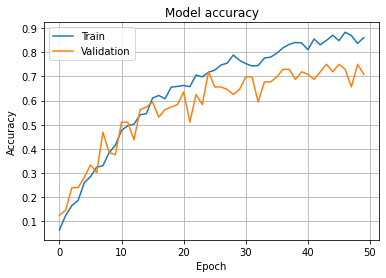

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [18]:
vgg_pretrain_model = VGG16(include_top=False, weights='imagenet', input_shape=(224,224,3))
vgg_pretrain_model.trainable = False
pretrain_model = Sequential([
    vgg_pretrain_model,
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(17, activation='softmax')
])
adam = optimizers.Adam(lr=1e-4)
pretrain_model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=["accuracy"])

In [19]:
history2 = pretrain_model.fit_generator(
            train_generator,
            steps_per_epoch=33,
            epochs=50,
            validation_data=val_generator,
            validation_steps=3,
            verbose=1,
            workers=1
        )

Epoch 1/50
33/33 [==============================] - 13s 383ms/step - loss: 11.4631 - accuracy: 0.3734 - val_loss: 6.7192 - val_accuracy: 0.5833
Epoch 2/50
33/33 [==============================] - 12s 375ms/step - loss: 3.4098 - accuracy: 0.6930 - val_loss: 3.1344 - val_accuracy: 0.7396
Epoch 3/50
33/33 [==============================] - 12s 373ms/step - loss: 2.4748 - accuracy: 0.7661 - val_loss: 3.0869 - val_accuracy: 0.7188
Epoch 4/50
33/33 [==============================] - 12s 369ms/step - loss: 1.9385 - accuracy: 0.7950 - val_loss: 2.8498 - val_accuracy: 0.7083
Epoch 5/50
33/33 [==============================] - 12s 369ms/step - loss: 1.6072 - accuracy: 0.8171 - val_loss: 2.7236 - val_accuracy: 0.7604
Epoch 6/50
33/33 [==============================] - 12s 372ms/step - loss: 1.5639 - accuracy: 0.8248 - val_loss: 1.7800 - val_accuracy: 0.8333
Epoch 7/50
33/33 [==============================] - 12s 369ms/step - loss: 1.2864 - accuracy: 0.8316 - val_loss: 2.3667 - val_accuracy: 0.760

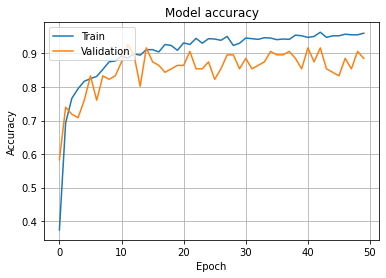

In [20]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()